In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image

(-0.5, 99.5, 99.5, -0.5)

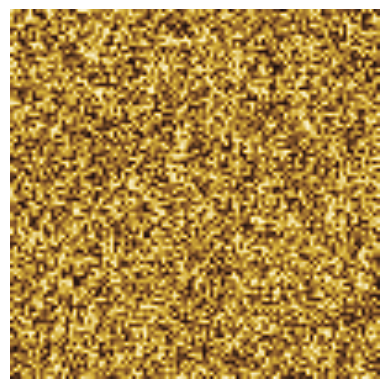

In [4]:
# Parametry
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005
size = 100
dx = 2.0 / size
dt = 0.001

# Inicjalizacja
U = np.random.rand(size, size)
V = np.random.rand(size, size)

# Definicja gepardziej palety
cheetah_colors = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]  
cheetah_cmap = LinearSegmentedColormap.from_list("cheetah", cheetah_colors)

# Przygotowanie figury
fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cheetah_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

In [5]:
def laplacian(Z):
    return (
        Z[:-2, 1:-1] + Z[2:, 1:-1] +
        Z[1:-1, :-2] + Z[1:-1, 2:] -
        4 * Z[1:-1, 1:-1]
    ) / dx**2

### Gepard

In [6]:
# def update(frame, U, V):
#     for _ in range(250):
#         deltaU = laplacian(U)
#         deltaV = laplacian(V)
#         Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
#         U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
#         V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
#         for Z in (U, V):
#             Z[0, :] = Z[1, :]
#             Z[-1, :] = Z[-2, :]
#             Z[:, 0] = Z[:, 1]
#             Z[:, -1] = Z[:, -2]
#     im.set_array(U)
#     return [im]

color_counts_over_time = []

def indexed_colormap(U_frame, cmap, bins=4):

    normed_U = (U_frame - U_frame.min())/(U_frame.max() - U_frame.min())
    indices = np.floor(normed_U*bins).astype(int)
    indices[indices == bins] = bins - 1 
    return indices

def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]

    im.set_array(U)
    
    color_indices = indexed_colormap(U, cheetah_cmap)
    counts = np.bincount(color_indices.ravel(), minlength=4)
    color_counts_over_time.append(counts)

    return [im]

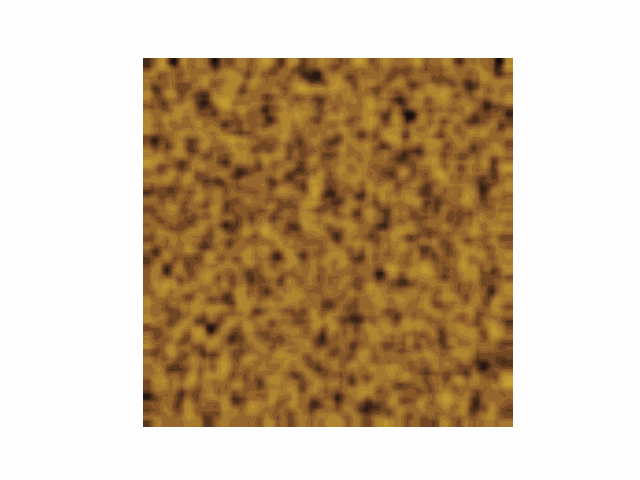

In [7]:
ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation.gif')

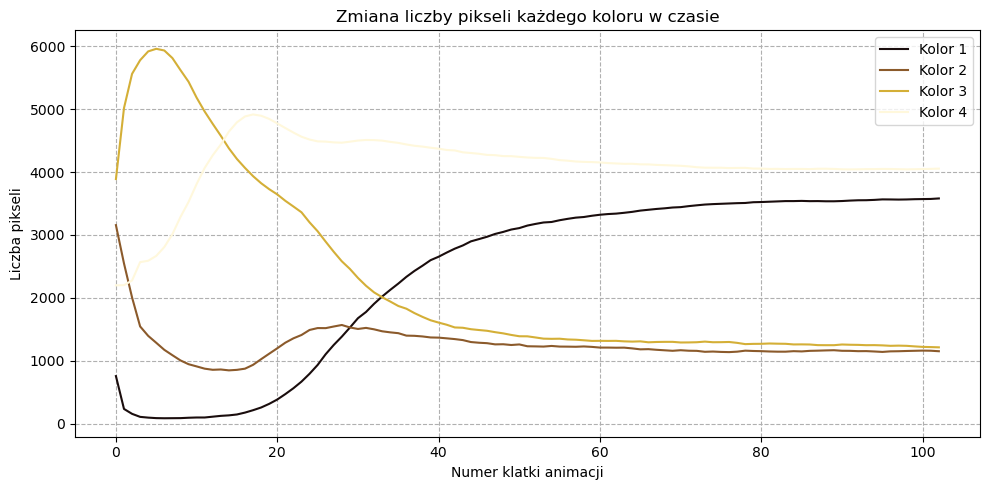

In [8]:
color_counts_over_time = np.array(color_counts_over_time)

plt.figure(figsize=(10, 5))
for i, color in enumerate(cheetah_colors):
    plt.plot(color_counts_over_time[:, i], label=f'Kolor {i+1}', color=color)
    
plt.title("Zmiana liczby pikseli każdego koloru w czasie")
plt.xlabel("Numer klatki animacji")
plt.ylabel("Liczba pikseli")
plt.legend()
plt.tight_layout()
plt.savefig("kolory_w_czasie.png")
plt.grid(linestyle="--")
plt.show()

### równanie ciepła

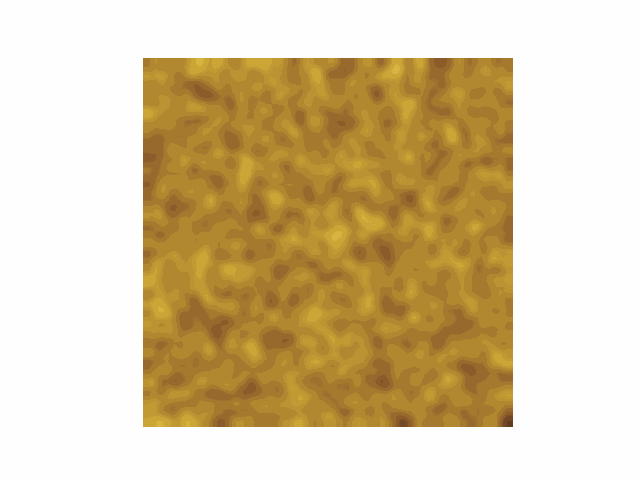

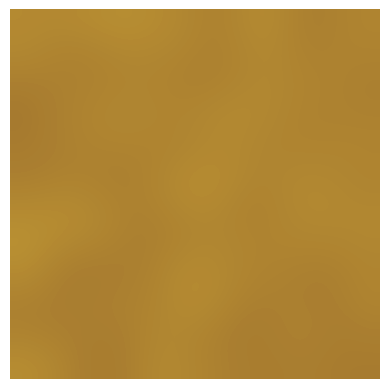

In [9]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)


fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cheetah_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

def update1(frame, U, V):
    for _ in range(400):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]
    im.set_array(U)
    return [im]

ani = FuncAnimation(fig, update1, frames=100, blit=True, fargs=(U, V))
ani.save("heat_animation.gif", writer=PillowWriter(fps=7))
Image(filename='heat_animation.gif')

### zebra

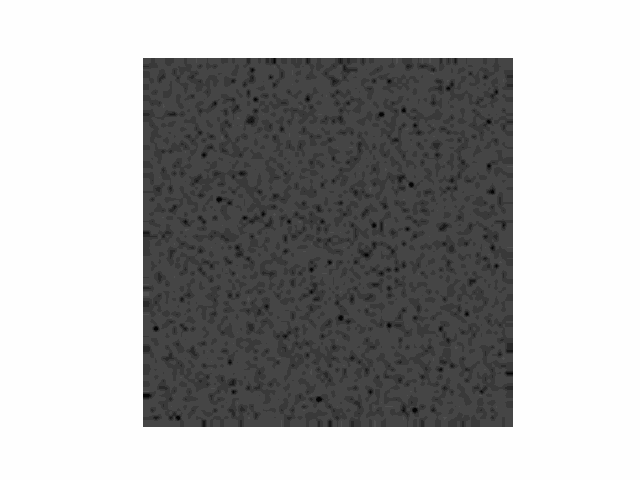

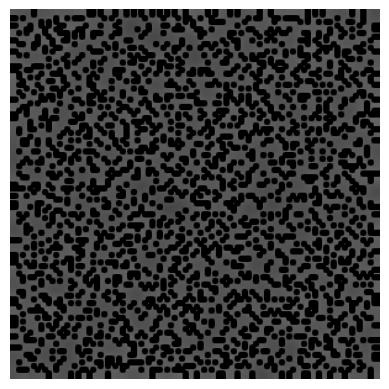

In [24]:
a = 1e-8
b = 5e-3
tau = 0.3
k = 0.055

zebra_colors = ["black", "white"]
zebra_cmap = LinearSegmentedColormap.from_list("zebra", zebra_colors)

U = 1 + 0.2 * np.random.randn(size, size)
V = 0.2 * np.random.randn(size, size)

fig, ax = plt.subplots()
im = ax.imshow(U, cmap=zebra_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]
    im.set_array(U)
    return [im]

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation_zebra.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation_zebra.gif')

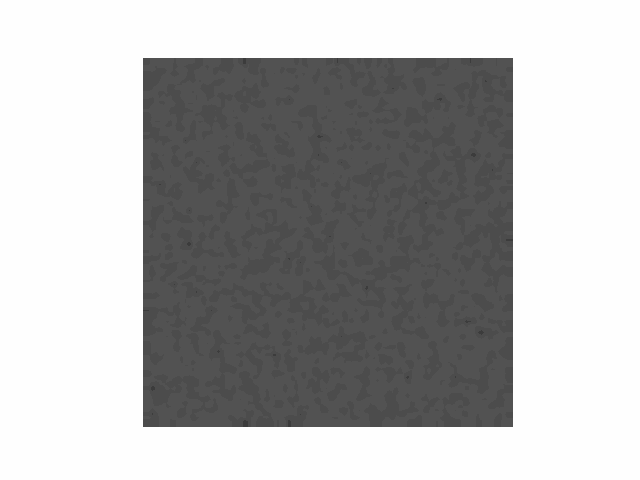

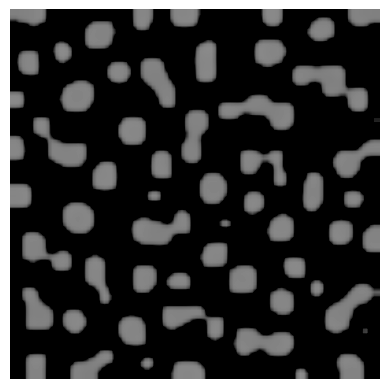

In [17]:
a = 1e-4
b = 0.02
tau = 0.9
k = -0.1

zebra_colors = ["black", "white"]
zebra_cmap = LinearSegmentedColormap.from_list("zebra", zebra_colors)

U = 1 + 0.2 * np.random.randn(size, size)
V = 0.2 * np.random.randn(size, size)

fig, ax = plt.subplots()
im = ax.imshow(U, cmap=zebra_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]
    im.set_array(U)
    return [im]

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation_zebra.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation_zebra.gif')

In [25]:
def run_turing_simulation(a, b, tau, k, size=100, dt=0.001, steps_per_frame=250, frames=100):
    dx = 2.0 / size  # Miejsce na dx musi być w funkcji, jeśli nie chcesz go przekazywać jako argument

    def laplacian(Z):
        return (
            Z[:-2, 1:-1] + Z[2:, 1:-1] +
            Z[1:-1, :-2] + Z[1:-1, 2:] -
            4 * Z[1:-1, 1:-1]
        ) / dx**2

    # Tworzenie folderu na wyniki
    os.makedirs("zebra_gifs", exist_ok=True)

    # Kolorystyka "zebra"
    zebra_colors = ["black", "white"]
    zebra_cmap = LinearSegmentedColormap.from_list("zebra", zebra_colors)

    # Początkowe warunki
    U = 1 + 0.2 * np.random.randn(size, size)
    V = 0.2 * np.random.randn(size, size)

    # Setup wykresu
    fig, ax = plt.subplots()
    im = ax.imshow(U, cmap=zebra_cmap, interpolation='bilinear', animated=True)
    ax.axis('off')

    def update(frame):
        nonlocal U, V
        for _ in range(steps_per_frame):
            deltaU = laplacian(U)
            deltaV = laplacian(V)
            Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
            U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
            V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau

            # Warunki brzegowe Neumanna
            for Z in (U, V):
                Z[0, :] = Z[1, :]
                Z[-1, :] = Z[-2, :]
                Z[:, 0] = Z[:, 1]
                Z[:, -1] = Z[:, -2]

        im.set_array(U)
        return [im]

    ani = FuncAnimation(fig, update, frames=frames, blit=True)

    # Nazwa pliku zawierająca parametry
    filename = f"a={a:.0e}_b={b:.3f}_tau={tau:.2f}_k={k:.2f}.gif"
    filepath = os.path.join("zebra_gifs", filename)

    ani.save(filepath, writer=PillowWriter(fps=7))
    plt.close()
    print(f"Saved GIF to: {filepath}")

In [31]:
import itertools

def search_turing_parameters(
    a_values, b_values, tau_values, k_values,
    size=100, dt=0.001, steps_per_frame=250, frames=100, max_gifs=None
):
    param_combinations = list(itertools.product(a_values, b_values, tau_values, k_values))

    if max_gifs:
        param_combinations = param_combinations[:max_gifs]

    print(f"🔍 Rozpoczynam generowanie {len(param_combinations)} symulacji...")

    for idx, (a, b, tau, k) in enumerate(param_combinations):
        print(f"\n▶️ {idx + 1}/{len(param_combinations)}: a={a}, b={b}, tau={tau}, k={k}")
        try:
            run_turing_simulation(a, b, tau, k, size=size, dt=dt, steps_per_frame=steps_per_frame, frames=frames)
        except Exception as e:
            print(f"❌ Błąd przy a={a}, b={b}, tau={tau}, k={k}: {e}")


In [33]:
a_values   = [1e-5, 2e-5, 5e-5]
b_values   = [0.01, 0.015, 0.02, 0.03]
tau_values = [0.2, 0.3, 0.4, 0.5]
k_values   = [0.05, 0.1, 0.15]


search_turing_parameters(a_values, b_values, tau_values, k_values, max_gifs=None)


🔍 Rozpoczynam generowanie 144 symulacji...

▶️ 1/144: a=1e-05, b=0.01, tau=0.2, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.20_k=0.05.gif

▶️ 2/144: a=1e-05, b=0.01, tau=0.2, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.20_k=0.10.gif

▶️ 3/144: a=1e-05, b=0.01, tau=0.2, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.20_k=0.15.gif

▶️ 4/144: a=1e-05, b=0.01, tau=0.3, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.30_k=0.05.gif

▶️ 5/144: a=1e-05, b=0.01, tau=0.3, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.30_k=0.10.gif

▶️ 6/144: a=1e-05, b=0.01, tau=0.3, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.30_k=0.15.gif

▶️ 7/144: a=1e-05, b=0.01, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.40_k=0.05.gif

▶️ 8/144: a=1e-05, b=0.01, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.40_k=0.10.gif

▶️ 9/144: a=1e-05, b=0.01, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.010_tau=0.40_k=0.15.gif

▶️ 10/144: a=1

C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.20_k=0.05.gif

▶️ 26/144: a=1e-05, b=0.02, tau=0.2, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.20_k=0.10.gif

▶️ 27/144: a=1e-05, b=0.02, tau=0.2, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.20_k=0.15.gif

▶️ 28/144: a=1e-05, b=0.02, tau=0.3, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.30_k=0.05.gif

▶️ 29/144: a=1e-05, b=0.02, tau=0.3, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.30_k=0.10.gif

▶️ 30/144: a=1e-05, b=0.02, tau=0.3, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.30_k=0.15.gif

▶️ 31/144: a=1e-05, b=0.02, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.40_k=0.05.gif

▶️ 32/144: a=1e-05, b=0.02, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.40_k=0.10.gif

▶️ 33/144: a=1e-05, b=0.02, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.40_k=0.15.gif

▶️ 34/144: a=1e-05, b=0.02, tau=0.5, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.50_k=0.05.gif

▶️ 35/144: a=1e-05, b=0.02, tau=0.5, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.50_k=0.10.gif

▶️ 36/144: a=1e-05, b=0.02, tau=0.5, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.020_tau=0.50

C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in subtract
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.20_k=0.05.gif

▶️ 38/144: a=1e-05, b=0.03, tau=0.2, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.20_k=0.10.gif

▶️ 39/144: a=1e-05, b=0.03, tau=0.2, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.20_k=0.15.gif

▶️ 40/144: a=1e-05, b=0.03, tau=0.3, k=0.05


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.30_k=0.05.gif

▶️ 41/144: a=1e-05, b=0.03, tau=0.3, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.30_k=0.10.gif

▶️ 42/144: a=1e-05, b=0.03, tau=0.3, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.30_k=0.15.gif

▶️ 43/144: a=1e-05, b=0.03, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.40_k=0.05.gif

▶️ 44/144: a=1e-05, b=0.03, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.40_k=0.10.gif

▶️ 45/144: a=1e-05, b=0.03, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.40_k=0.15.gif

▶️ 46/144: a=1e-05, b=0.03, tau=0.5, k=0.05
Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.50_k=0.05.gif

▶️ 47/144: a=1e-05, b=0.03, tau=0.5, k=0.1
Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.50_k=0.10.gif

▶️ 48/144: a=1e-05, b=0.03, tau=0.5, k=0.15
Saved GIF to: zebra_gifs\a=1e-05_b=0.030_tau=0.50_k=0.15.gif

▶️ 49/144: a=2e-05, b=0.01, tau=0.2, k=0.05
Saved GIF to: zebra_gifs\a=2e-05_b=0.010_tau=0.20_k=0.05.gif

▶️ 50/144: a=2e-05, b=0.01, tau=0.2, k=0.1
Saved GIF to: zebra_gifs\a=2e-05_b=0.010_tau=0.20_k=0.10.gif

▶️ 51/144: a=2e-05, b=0.01, tau=0.2, k=0.15
Saved GIF to: zebra_gifs\a=2e-05_b=0.010_tau=0.20

C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.20_k=0.05.gif

▶️ 74/144: a=2e-05, b=0.02, tau=0.2, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.20_k=0.10.gif

▶️ 75/144: a=2e-05, b=0.02, tau=0.2, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.20_k=0.15.gif

▶️ 76/144: a=2e-05, b=0.02, tau=0.3, k=0.05
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.30_k=0.05.gif

▶️ 77/144: a=2e-05, b=0.02, tau=0.3, k=0.1
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.30_k=0.10.gif

▶️ 78/144: a=2e-05, b=0.02, tau=0.3, k=0.15
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.30_k=0.15.gif

▶️ 79/144: a=2e-05, b=0.02, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.40_k=0.05.gif

▶️ 80/144: a=2e-05, b=0.02, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.40_k=0.10.gif

▶️ 81/144: a=2e-05, b=0.02, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.40_k=0.15.gif

▶️ 82/144: a=2e-05, b=0.02, tau=0.5, k=0.05
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.50_k=0.05.gif

▶️ 83/144: a=2e-05, b=0.02, tau=0.5, k=0.1
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.50_k=0.10.gif

▶️ 84/144: a=2e-05, b=0.02, tau=0.5, k=0.15
Saved GIF to: zebra_gifs\a=2e-05_b=0.020_tau=0.50

C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in subtract
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.20_k=0.05.gif

▶️ 86/144: a=2e-05, b=0.03, tau=0.2, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in subtract
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)


Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.20_k=0.10.gif

▶️ 87/144: a=2e-05, b=0.03, tau=0.2, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in subtract
  Z[:-2, 1:-1] + Z[2:, 1:-1] +
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in subtract
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)


Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.20_k=0.15.gif

▶️ 88/144: a=2e-05, b=0.03, tau=0.3, k=0.05


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.30_k=0.05.gif

▶️ 89/144: a=2e-05, b=0.03, tau=0.3, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.30_k=0.10.gif

▶️ 90/144: a=2e-05, b=0.03, tau=0.3, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.30_k=0.15.gif

▶️ 91/144: a=2e-05, b=0.03, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.40_k=0.05.gif

▶️ 92/144: a=2e-05, b=0.03, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.40_k=0.10.gif

▶️ 93/144: a=2e-05, b=0.03, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.40_k=0.15.gif

▶️ 94/144: a=2e-05, b=0.03, tau=0.5, k=0.05
Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.50_k=0.05.gif

▶️ 95/144: a=2e-05, b=0.03, tau=0.5, k=0.1
Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.50_k=0.10.gif

▶️ 96/144: a=2e-05, b=0.03, tau=0.5, k=0.15
Saved GIF to: zebra_gifs\a=2e-05_b=0.030_tau=0.50_k=0.15.gif

▶️ 97/144: a=5e-05, b=0.01, tau=0.2, k=0.05
Saved GIF to: zebra_gifs\a=5e-05_b=0.010_tau=0.20_k=0.05.gif

▶️ 98/144: a=5e-05, b=0.01, tau=0.2, k=0.1
Saved GIF to: zebra_gifs\a=5e-05_b=0.010_tau=0.20_k=0.10.gif

▶️ 99/144: a=5e-05, b=0.01, tau=0.2, k=0.15
Saved GIF to: zebra_gifs\a=5e-05_b=0.010_tau=0.20

C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.20_k=0.05.gif

▶️ 122/144: a=5e-05, b=0.02, tau=0.2, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.20_k=0.10.gif

▶️ 123/144: a=5e-05, b=0.02, tau=0.2, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.20_k=0.15.gif

▶️ 124/144: a=5e-05, b=0.02, tau=0.3, k=0.05
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.30_k=0.05.gif

▶️ 125/144: a=5e-05, b=0.02, tau=0.3, k=0.1
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.30_k=0.10.gif

▶️ 126/144: a=5e-05, b=0.02, tau=0.3, k=0.15
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.30_k=0.15.gif

▶️ 127/144: a=5e-05, b=0.02, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.40_k=0.05.gif

▶️ 128/144: a=5e-05, b=0.02, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.40_k=0.10.gif

▶️ 129/144: a=5e-05, b=0.02, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.40_k=0.15.gif

▶️ 130/144: a=5e-05, b=0.02, tau=0.5, k=0.05
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.50_k=0.05.gif

▶️ 131/144: a=5e-05, b=0.02, tau=0.5, k=0.1
Saved GIF to: zebra_gifs\a=5e-05_b=0.020_tau=0.50_k=0.10.gif

▶️ 132/144: a=5e-05, b=0.02, tau=0.5, k=0.15
Saved GIF to: zebra_gifs\a=5e-05_b=0.020

C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.20_k=0.05.gif

▶️ 134/144: a=5e-05, b=0.03, tau=0.2, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.20_k=0.10.gif

▶️ 135/144: a=5e-05, b=0.03, tau=0.2, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:5: RuntimeWarning: overflow encountered in divide
  return (
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in subtract
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in subtract
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.20_k=0.15.gif

▶️ 136/144: a=5e-05, b=0.03, tau=0.3, k=0.05


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.30_k=0.05.gif

▶️ 137/144: a=5e-05, b=0.03, tau=0.3, k=0.1


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.30_k=0.10.gif

▶️ 138/144: a=5e-05, b=0.03, tau=0.3, k=0.15


C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: overflow encountered in power
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:33: RuntimeWarning: invalid value encountered in add
  U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
C:\Users\skrza\AppData\Local\Temp\ipykernel_11068\1992929442.py:6: RuntimeWarning: invalid value encountered in add
  Z[:-2, 1:-1] + Z[2:, 1:-1] +


Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.30_k=0.15.gif

▶️ 139/144: a=5e-05, b=0.03, tau=0.4, k=0.05
Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.40_k=0.05.gif

▶️ 140/144: a=5e-05, b=0.03, tau=0.4, k=0.1
Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.40_k=0.10.gif

▶️ 141/144: a=5e-05, b=0.03, tau=0.4, k=0.15
Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.40_k=0.15.gif

▶️ 142/144: a=5e-05, b=0.03, tau=0.5, k=0.05
Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.50_k=0.05.gif

▶️ 143/144: a=5e-05, b=0.03, tau=0.5, k=0.1
Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.50_k=0.10.gif

▶️ 144/144: a=5e-05, b=0.03, tau=0.5, k=0.15
Saved GIF to: zebra_gifs\a=5e-05_b=0.030_tau=0.50_k=0.15.gif


In [34]:
from IPython.display import display, Image
import os

def show_all_gifs(folder="zebra_gifs"):
    gif_files = [f for f in os.listdir(folder) if f.endswith(".gif")]
    gif_files.sort()  # sortowanie alfabetyczne, np. po parametrach

    if not gif_files:
        print("❌ Brak GIF-ów w folderze.")
        return

    for gif in gif_files:
        print(f"📂 {gif}")
        display(Image(filename=os.path.join(folder, gif)))

In [37]:
#show_all_gifs()
